<a href="https://colab.research.google.com/github/chriswilson2020/PyTorchCoLab/blob/main/02_pytorch_classification_exercieses_ScratchPad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import dependencies
import torch
from torch import nn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Doc Links
* sklearn make_moons - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

In [2]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Our current device is: {device}")

Our current device is: cuda


In [3]:
#let's see what device we actually have
!nvidia-smi

Sat Dec  3 10:22:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    29W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Setup Hyperparameters
RANDOM_SEED = 42
SAMPLES = 1000
SHUFFLE=True
NOISE=0.07
RANDOM_STATE=RANDOM_SEED

In [5]:
# Use sklearn to make half moon dataset consisting of 
# 1000 samples, 2 moon and a split of 80:20
X, y = make_moons(n_samples=SAMPLES,
                  shuffle=SHUFFLE,
                  noise=NOISE,
                  random_state=RANDOM_STATE)


In [6]:
# Turn the data into a Pandas Dataframe
moons = pd.DataFrame({"X1": X[:,0],
                      "X2": X[:,1],
                      "label": y})
moons.head(10)

,X1,X2,label
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0
5,0.599064,-0.289773,1
6,0.290090,-0.204688,1
7,-0.038269,0.459429,1
8,1.613771,-0.293970,1
9,0.693337,0.827819,0


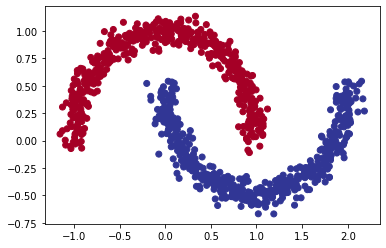

In [7]:
# Visualise the dataset
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [8]:
# Turn the data into tensors (type dtype float)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [9]:
# Check our tensors

print(f"First five samples of X tensor: {X[:5]}\n")
print(f"First five samples of y tensor {y[:5]}")

First five samples of X tensor: tensor([[-0.0334,  0.4214],
        [ 0.9988, -0.4429],
        [ 0.8896, -0.3278],
        [ 0.3420, -0.4177],
        [-0.8385,  0.5324]])

First five samples of y tensor tensor([1., 1., 1., 1., 0.])


In [10]:
# Split the data into training and test sets (80:20)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)

In [11]:
# Check out the test train split
print(f"The length of X_train: {len(X_train)} and the length of X_test {len(X_test)}\n")
print(f"The length of y_train: {len(y_train)} and the length of y_test {len(y_test)}\n")


The length of X_train: 800 and the length of X_test 200

The length of y_train: 800 and the length of y_test 200



In [12]:
# Build a model and instantiate it
class MoonModelV0(nn.Module):
  def __init__(self, input, output, hidden=8 ):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = input, out_features = hidden)
    self.layer_2 = nn.Linear(in_features=hidden, out_features=hidden)
    self.layer_3 = nn.Linear(in_features=hidden, out_features=output)
    self.relu = nn.ReLU()
  
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [13]:
# Instantiate our model
model_0 = MoonModelV0(input=2,
        output=1,
        hidden=8).to(device)

In [14]:
# Take a look at the model
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [15]:
# Peek at the state_dict()
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.3821, -0.6172],
                      [-0.3334, -0.3502],
                      [ 0.2457, -0.0797],
                      [ 0.5250, -0.6623],
                      [-0.5440, -0.1721],
                      [-0.1820,  0.1926],
                      [ 0.2641,  0.5666],
                      [ 0.6676, -0.2300]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.3352, -0.1890,  0.3796, -0.4658, -0.1338,  0.2050, -0.5229, -0.4173],
                     device='cuda:0')),
             ('layer_2.weight',
              tensor([[-1.8056e-01,  2.9481e-01, -3.4798e-01, -1.8001e-01, -6.5337e-02,
                        4.4710e-02, -5.1744e-02,  1.5385e-01],
                      [ 1.5875e-01,  3.2471e-01, -2.8713e-01, -1.4495e-01, -2.0175e-01,
                       -2.0187e-01, -1.7591e-01, -5.3373e-02],
                      [ 9.3251e-02,  2.7755e-01, -2.8107e-01, -1.6159e-02, -2.1664e-01,
                       -3.7530e-02,  1.

In [16]:
# Make some predicitons with the model to test?
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape of predictions: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [17]:
# Setup the loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [18]:
# See what is coming out of the model in 
# logits -> prediction probabilities -> prediciton labels
model_0.eval()
with torch.inference_mode():
  print("Logits:")
  print(model_0(X_train.to(device)[:10]).squeeze(), "\n")

  print("Prediction Probabilities")
  print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()), "\n")

  print("Prediction Labels")
  print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))


Logits:
tensor([-0.2134, -0.2290, -0.1337, -0.1363, -0.2271, -0.1353, -0.2341, -0.2032,
        -0.1560, -0.2492], device='cuda:0') 

Prediction Probabilities
tensor([0.4468, 0.4430, 0.4666, 0.4660, 0.4435, 0.4662, 0.4417, 0.4494, 0.4611,
        0.4380], device='cuda:0') 

Prediction Labels
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


In [19]:
# Calculation of the accuracy 
!pip -q install torchmetrics
from torchmetrics import Accuracy

In [20]:
# Implement the accuracy function from torchmetrics
acc_fn = Accuracy(task='multiclass', num_classes=2).to(device)
acc_fn

MulticlassAccuracy()

In [21]:
## Build a model
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 10000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [22]:
# Run the epoch loop

for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred_labels = torch.round(y_pred_probs)

  # Loss function
  loss = loss_fn(y_logits, y_train) #Note loss function has builtin sigmoid
  acc = acc_fn(y_pred_labels, y_train.int())

  # Zero gradients
  optimizer.zero_grad()

  # Back propagation
  loss.backward()

  # Gradient descent
  optimizer.step()

  #########################################
  # Testing
  model_0.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred_labels = torch.round(torch.sigmoid(test_logits))

    # Calculate the loss / accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred_labels, y_test.int())

  # Print out results on the fly
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc: {acc:.2f} | Test loss: {test_loss:.5f} Test Acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.70821 Acc: 0.50 | Test loss: 0.70797 Test Acc: 0.50
Epoch: 100 | Loss: 0.69893 Acc: 0.50 | Test loss: 0.69913 Test Acc: 0.50
Epoch: 200 | Loss: 0.69100 Acc: 0.50 | Test loss: 0.69171 Test Acc: 0.50
Epoch: 300 | Loss: 0.68282 Acc: 0.72 | Test loss: 0.68414 Test Acc: 0.71
Epoch: 400 | Loss: 0.67291 Acc: 0.62 | Test loss: 0.67512 Test Acc: 0.57
Epoch: 500 | Loss: 0.65989 Acc: 0.68 | Test loss: 0.66346 Test Acc: 0.63
Epoch: 600 | Loss: 0.64273 Acc: 0.73 | Test loss: 0.64799 Test Acc: 0.71
Epoch: 700 | Loss: 0.62052 Acc: 0.76 | Test loss: 0.62794 Test Acc: 0.71
Epoch: 800 | Loss: 0.59352 Acc: 0.78 | Test loss: 0.60371 Test Acc: 0.73
Epoch: 900 | Loss: 0.56291 Acc: 0.80 | Test loss: 0.57623 Test Acc: 0.75
Epoch: 1000 | Loss: 0.53128 Acc: 0.80 | Test loss: 0.54745 Test Acc: 0.76
Epoch: 1100 | Loss: 0.50078 Acc: 0.79 | Test loss: 0.51895 Test Acc: 0.77
Epoch: 1200 | Loss: 0.47274 Acc: 0.80 | Test loss: 0.49180 Test Acc: 0.79
Epoch: 1300 | Loss: 0.44703 Acc: 0.82 | Test loss:

In [23]:
# Function to plot decision boundry 
# Plot the model predictions
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

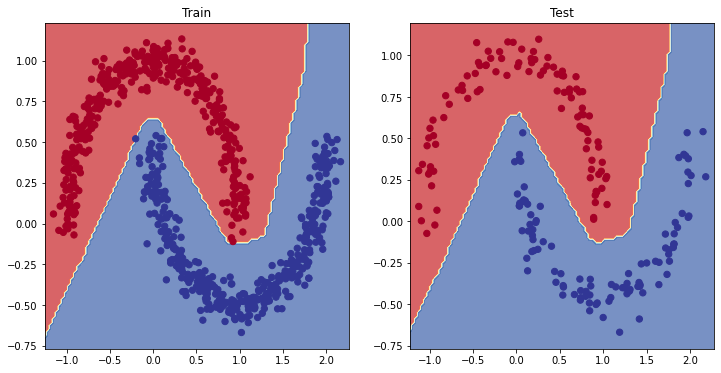

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)